# Deep Learning Bootcamp November 2017, GPU Computing for Data Scientists

<img src="../images/bcamp.png" align="center">

## 08 PyTorch Image Classification using Pretrained squeezenet1_1

Web: https://www.meetup.com/Tel-Aviv-Deep-Learning-Bootcamp/events/241762893/

Notebooks: <a href="https://github.com/QuantScientist/Data-Science-PyCUDA-GPU"> On GitHub</a>

*Shlomo Kashani*

<img src="../images/pt.jpg" width="35%" align="center">


# PyTorch Imports


In [1]:
# !pip install pycuda
%reset -f
import numpy
import numpy as np

# imports
import numpy as np                     # numeric python lib
import matplotlib.image as mpimg       # reading images to numpy arrays
import matplotlib.pyplot as plt        # to plot any graph
import matplotlib.patches as mpatches  # to draw a circle at the mean contour
import scipy.ndimage as ndi            # to determine shape centrality
# matplotlib setup
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # setting default size of plots

import tensorflow as tf 
print("tensorflow:" + tf.__version__)
!set "KERAS_BACKEND=tensorflow"

import numpy as np
import matplotlib.pyplot as plt

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from PIL import Image, ImageFilter
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import matplotlib.pyplot as plot   # Library to plot
import matplotlib.cm as colormap   # Library to plot
import PIL
from PIL import Image as PILImage
import time
%matplotlib inline


import torch
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())

print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())

from __future__ import print_function
import torch
x=torch.Tensor(3,2)
print (type(x))
print (x)
torch.from_numpy (np.zeros((3,4))).cuda()

tensorflow:1.4.0
('__Python VERSION:', '2.7.12 (default, Nov 19 2016, 06:48:10) \n[GCC 5.4.0 20160609]')
('__pyTorch VERSION:', '0.2.0_2')
__CUDA VERSION
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61
('__CUDNN VERSION:', 6021)
('__Number CUDA Devices:', 1L)
__Devices
('Active CUDA Device: GPU', 0L)
('Available devices ', 1L)
('Current cuda device ', 0L)
<class 'torch.FloatTensor'>

-2.3711e+30  4.5796e-41
-2.3711e+30  4.5796e-41
 1.0338e-35  0.0000e+00
[torch.FloatTensor of size 3x2]




 0  0  0  0
 0  0  0  0
 0  0  0  0
[torch.cuda.DoubleTensor of size 3x4 (GPU 0)]

# PyTorch image pre-processing 

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be atleast 224.

The images have to be loaded in to a range of [0, 1] and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]

An example of such normalization can be found in the imagenet example here: https://github.com/pytorch/examples/blob/42e5b996718797e45c46a25c55b031e6768f8440/imagenet/main.py#L89-L10119


In [2]:
import io
import requests
from PIL import Image
from torchvision import models, transforms
from torch.autograd import Variable

LABELS_URL = 'http://s3.amazonaws.com/outcome-blog/imagenet/labels.json'

# This can be any image you like
IMG_URL = '../images/nematode.jpg'

# Initialize the pre-trained model
squeeze = models.squeezenet1_1(pretrained=True)

# Image pre-processing transforms
normalize = transforms.Normalize( # Imagenet, we've done a pass on the dataset and calculated per-channel mean/std.
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])

Downloading: "https://download.pytorch.org/models/squeezenet1_1-f364aa15.pth" to /home/shlomokashani/.torch/models/squeezenet1_1-f364aa15.pth
100%|██████████| 4966400/4966400 [00:01<00:00, 2812385.51it/s]


In [3]:
# Create a pillow image
im = Image.open(IMG_URL)

<class 'PIL.JpegImagePlugin.JpegImageFile'>


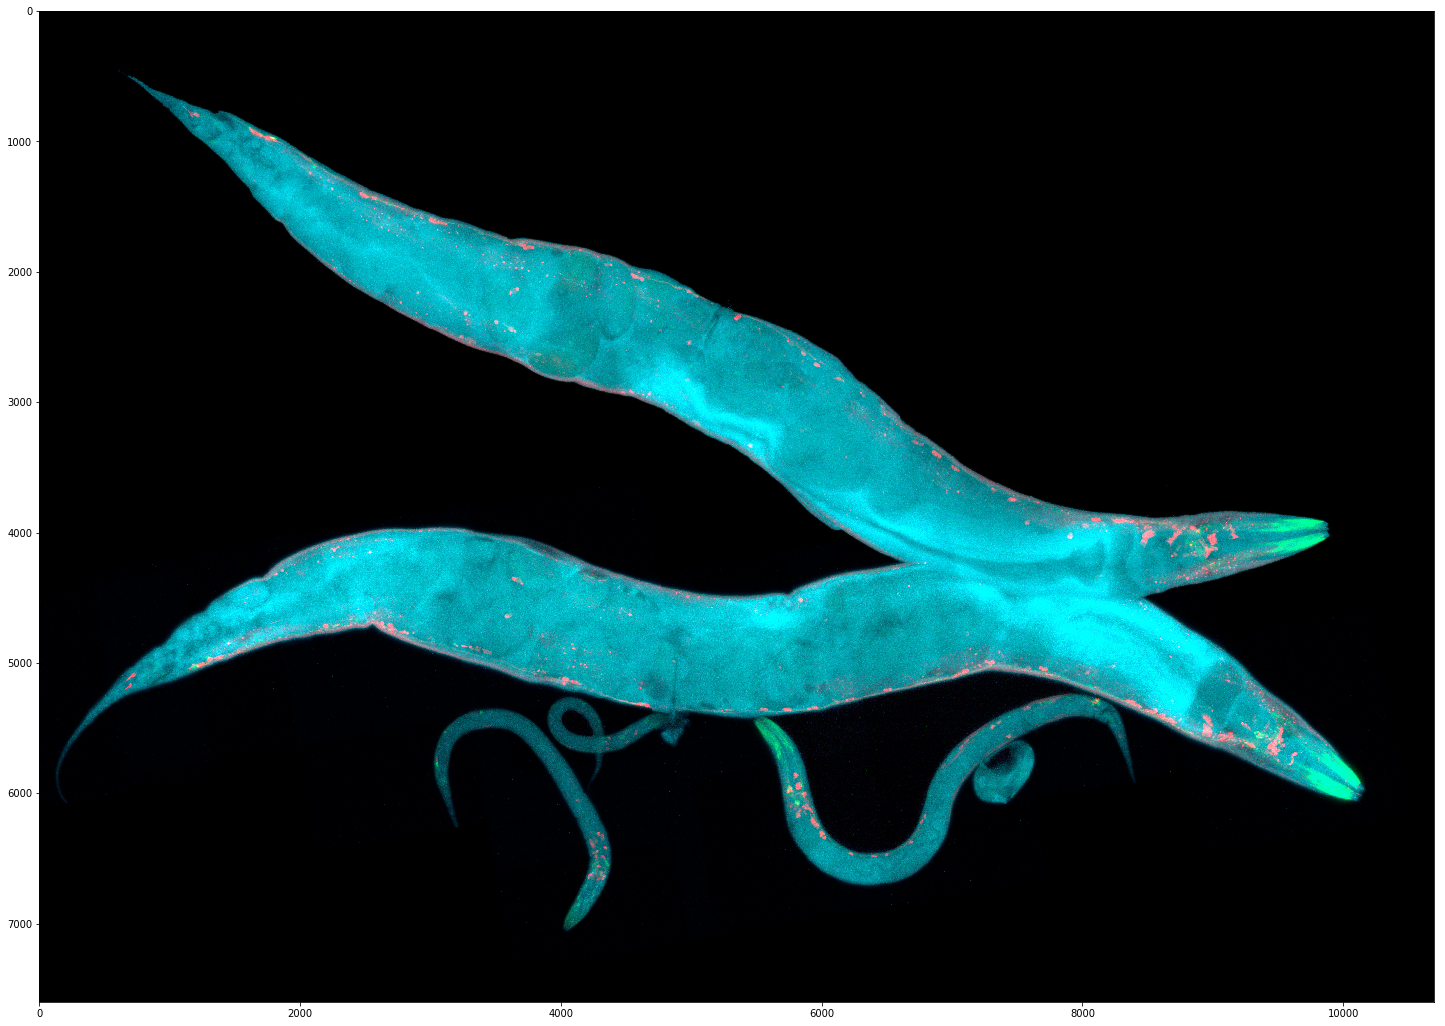

In [4]:
print (str (type(im)))
figure = plot.figure()
figure.set_size_inches(25, 25)
imshow(im)

# Apply transforms 

In [5]:
img_tensor = preprocess(im)
# Add a batch dimension
img_tensor.unsqueeze_(0)
# Forward pass without activation
fc_out = squeeze(Variable(img_tensor))

# Download ImageNet labels and store them as a dict
labels = {int(key):value for (key, value)
          in requests.get(LABELS_URL).json().items()}

In [6]:
# Print the label
print(labels[fc_out.data.numpy().argmax()])

nematode, nematode worm, roundworm
